# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
df = pd.read_csv("hasil_clustering.csv")
df.head()

,gk,peng,ump,upah,cluster
0,2180,228,67,13,3
1,2180,9,67,13,3
2,2180,1222,67,13,0
3,2180,493,67,13,3
4,2180,740,67,13,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [8]:
#pisahkan fitur dan label
X = df[['gk', 'peng', 'ump', 'upah']]
y = df['cluster']

#split data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

=== Akurasi Random Forest ===
Akurasi: 0.9929623567921441

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2443
           1       0.99      0.99      0.99      2670
           2       0.99      0.99      0.99      3496
           3       0.99      1.00      0.99      3611

    accuracy                           0.99     12220
   macro avg       0.99      0.99      0.99     12220
weighted avg       0.99      0.99      0.99     12220



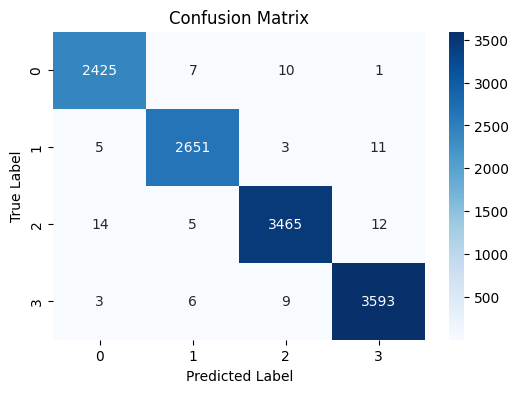

In [18]:
# prediksi dan evaluasi model
y_pred = model.predict(X_test_scaled)

print("=== Akurasi Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 7. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [22]:
# definisi parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# inisialisasi model dan GridSearch
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# jalankan grid search
grid_search.fit(X_train_scaled, y_train)

# tampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [23]:
# prediksi dengan model terbaik setelah tuning hyperparameter
y_pred_tuned = grid_search.predict(X_test_scaled)

# menghitung akurasi model dengan prediksi yg telah dilakukan
accuracy = accuracy_score(y_test, y_pred_tuned)
print("Akurasi Random Forest Setelah Tuning:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix Setelah Tuning:", conf_matrix)

classification_rep = classification_report(y_test, y_pred_tuned)
print("Classification Report Setelah Tuning:", classification_rep)

Akurasi Random Forest Setelah Tuning: 0.9928805237315875
Confusion Matrix Setelah Tuning: [[2425    8    9    1]
 [   6 2650    4   10]
 [  15    6 3465   10]
 [   3    6    9 3593]]
Classification Report Setelah Tuning:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2443
           1       0.99      0.99      0.99      2670
           2       0.99      0.99      0.99      3496
           3       0.99      1.00      0.99      3611

    accuracy                           0.99     12220
   macro avg       0.99      0.99      0.99     12220
weighted avg       0.99      0.99      0.99     12220



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
 - Akurasi sebelum Tuning Model : 0.9929623567921441
 - Akurasi setelah Tuning Model : 0.9928805237315875
 - tidak ada perubahan yg signifikan setelah dilakukan tuning, akurasi model tetap tinggi, performanya tetap sangat baik dan stabil
2. Identifikasi kelemahan model, seperti:
  - Berdasarkan classification report, nilai precision, recall, dan f1-score di semua kelas sangat tinggi (≥ 0.99), menunjukkan distribusi prediksi yang sangat seimbang.
  - Tidak ada kelas yang memiliki nilai metrik rendah secara signifikan
  - Model tidak menunjukkan tanda-tanda underfitting maupun overfitting yang berarti. Hal ini ditunjukkan dengan performa yang konsisten dan skor yang merata di semua kelas.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  - Karena model sudah memiliki performa yang sangat tinggi, langkah berikutnya diarahkan pada evaluasi kestabilan model terhadap data baru
  - Mencoba algoritma klasifikasi yg lain seperti Decision Tree atau SVM
  